# Proyecto Final Introducción a la Inteligencia Artificial: Introducción a las Maquinas de Soporte Vectorial y Algunas aplicaciones

David Alejandro Alquichire Rincón\
Cristian Camilo Barreto Bejarano

Universidad Nacional de Colombia







# Introducción

En este cuaderno vamos a abordar la un poco sobre la librería **sklearn** para la clasificación de imagenes. En especifico, haremos algunas pruebas con los metodos de maquinas de soporte vectorial (SVM) el cual busca generar una división entre un conjunto de puntos de distintas clases de tal manera que, al introducir un nuevo conjunto de datos, los clasifique correctamente.

# ¿Qué es SVM?
Supongamos que tenemos un conjunto de datos $X=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$ con $x_i\in \mathbb{R}^n$ y $y_i\in \{-1,1\}$ para todo $1\leq i\leq n$.
La idea básica del método es encontrar un hiperplano tal que los puntos de una misma clase se encuentren al mismo lado del plano, es decir, encontrar $W\in \mathbb{R}^n$ tal que 
$$
y_i(x_i^TW + b)> 0 \textit{ para todo $i\in \mathbb{N}. $ }
$$
Para ello, se usan varias tecnicas y suposicones para realizar dicha tarea.\\
A continuación veamos algunas tecnicas, ejemplos y experimentos.

#1. Lineal y Separable

Tomemos unos vectores de entrenamiento.

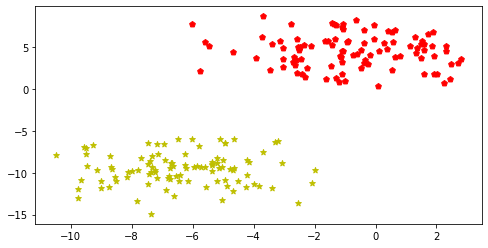

In [ ]:
# Importar librerias
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm

# Crear axis para dibujar
plt.figure(figsize=(8,4))

# Graficar recta
def plot_line(slope, intercept, X):
  min_x = int( min(X[:,0]) ) # Valor mínimo característica 1
  max_x = int( max(X[:,0]) ) # Valor máximo característica 1
  x = range(min_x, max_x)
  y = -(x*slope[0] + intercept)/slope[1]
  plt.plot(x,y, color='black')

CENTERS = 2
# Generar muestras aleatorias
X,y = make_blobs(n_samples=200, n_features=2,centers=CENTERS, random_state=11, cluster_std=2)

# Graficar muestras aleatorias
for target, color, marker in zip(range(2), ['y','r'], ['*', 'p']):
  plt.scatter(X[y==target,0], X[y==target,1], c=color, marker=marker)



Entrenemos el modelo.

In [ ]:
# Support Vector Classification.
# svm -> Scikit Learn

# SVC = Support Vector Clasification: 
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

In [ ]:
print(clf.coef_) # Pendiente Hiperplano

[[0.0799781  0.26467908]]


In [ ]:
print(clf.intercept_) # Punto intercepto hiperplano

[0.89697376]


In [ ]:
clf.support_vectors_[:,0] # vectores de soporte

array([-3.19850642,  0.09093742, -5.75181603])

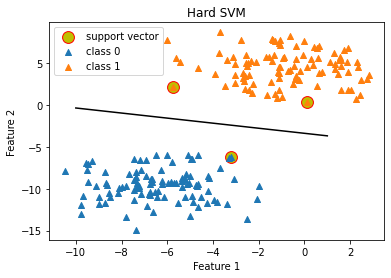

In [ ]:
plt.scatter( clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='o', edgecolor='r', color='y', s=140, label='support vector')
for target in range(CENTERS):
  plt.scatter(X[y==target,0], X[y==target,1], marker='^', label='class '+format(target))

plot_line(clf.coef_[0], clf.intercept_, X)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard SVM')
plt.legend()
plt.show()

#2. C-SVM

A pesar de que siempre se intenta dejar una margen para clasificar los datos, a veces es mejor ser un poco más laxos con

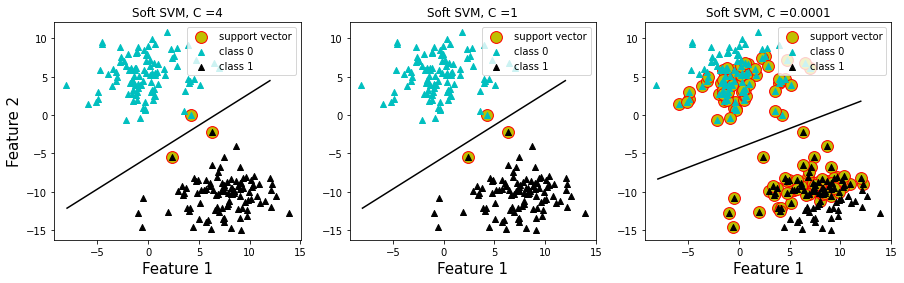

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm


CENTERS = 2
fig, axs = plt.subplots(1,3,figsize=(15,4))

# gráfica los vectores de soporte
def plot(clf, X, C, ax):
  axs[ax].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='o', edgecolor='r', color='y', s=140, label='support vector')
  for target, color in zip( range(CENTERS), ['c', 'k'] ):
    axs[ax].scatter( X[y==target, 0], X[y==target,1], marker='^', color=color, label="class "+format(target)  )
  plot_line(clf.coef_[0], clf.intercept_, X, ax)
  axs[ax].set_xlabel('Feature 1', fontsize=15)
  if ax == 0:
    axs[ax].set_ylabel('Feature 2', fontsize=15)
  axs[ax].set_title('Soft SVM, C =' + str(C))
  axs[ax].legend()
  return

# gráfica la función de decisión
def plot_line(slope, intercept, X, ax):
  min_x = int( min(X[:,0]) )
  max_x = int( max(X[:,0]) )
  x = range(min_x, max_x)
  y = -(x*slope[0] + intercept )/slope[1]
  axs[ax].plot(x,y,color='black')

# generador de datos aleatorios
X, y = make_blobs(n_samples=200, n_features=2, centers=CENTERS, random_state=14, cluster_std=2.5)

# gráfica 3 gráficas variando el valor de C
for C, ax in zip( [4,1,0.0001], range(3) ):
  clf = svm.SVC(kernel='linear', C=C)
  clf.fit(X,y)
  plot(clf,X,C,ax)
plt.show()

Los vectores resaltados en amarillo son los conocidos vectores de soporte, los cuales son puntos que estan sobre la margen del hiperplano o dentro de la margen.

# 3. Distribución Gaussiana


Se importan las librerias,

*   Matplotlib: Creación de gráficas.
*   Scikit Learn: Creación de SVM, base de datos de muestras aleatorias.
*   Math
*   Numpy: Manejo de matrices y tuplas


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm





Función de distribución Gaussiana. Estandarizar las muestras. 

In [ ]:

# Distribución normal estandar, gaussiana, clase kernel
def gaussian(deviation):

    gaussian_y = []
    i = np.arange(0.0,1.0,0.01)

    for x in i:
        z = (x-mean_x)/deviation
        gaussian_y.append( kernel(z) )
    return i, gaussian_y


Función Kernel, RBF: $k(\textbf{z}) = exp(\frac{\frac{z^{2}}{2}}{\sqrt{2\pi}})$. 

Creación de una figura.

In [ ]:
# Radial Basis Function
def kernel(z):
    return math.exp( -(z*z)/2)/math.sqrt(2*math.pi)

plt.figure( figsize=(8,4) )



<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

Con ``` make_blobs ```, se genera 200 muestras aleatorias, con 2 características, 4 centros.

Gráficamos estas muestras como puntos en el plano.



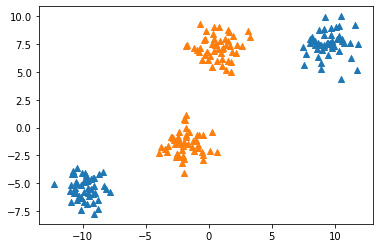

In [ ]:
CENTERS = 4
X, y = make_blobs( n_samples=200, n_features=2, centers=CENTERS, random_state=8, cluster_std=1 )

y = y % 2 # Generar dos clases no separables linealmente

for target in range(CENTERS):
    plt.scatter( X[y==target,1], X[y==target,0], marker="^", label="class "+format(target) )


Con ```MinMaxScaler() ``` permite ajustar valores de una muestra, tal que queden en el rango de (0, 1).  Ajustamos la muestra X con ```fit()```. Finalmente, aplicamos transformación y graficamos.

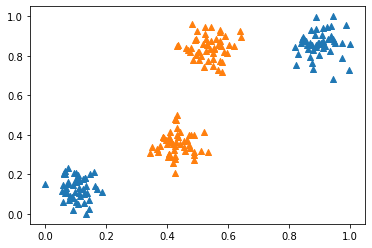

In [ ]:

scaler = MinMaxScaler() # Ajuste de valores de un rango de (0, 1)
scaler.fit(X) # Ajustar X
X = scaler.transform(X) # Transformar X

# Para clasificar las clases no linealmente separables. Usar función 
# gaussiona como Kernel.


for target in range(CENTERS):
    plt.scatter( X[y==target,1], X[y==target,0], marker="^", label="class "+format(target) )




Mostrar diferentes formas de la distribución Gaussiana, varian según la desviación estándar. Se muestra el funcionamiento del Kernel Gaussiano, para el aumento de dimensionalidad de las muestras.

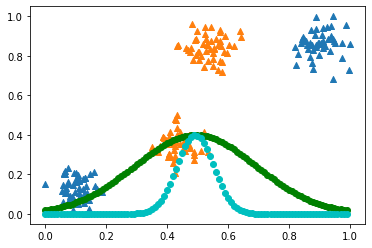

In [ ]:
for target in range(CENTERS):
    plt.scatter( X[y==target,1], X[y==target,0], marker="^", label="class "+format(target) )
mean_x = np.mean(X[:, 1])

DEVIATION = 0.2
x, gaussian_y = gaussian(DEVIATION)
plt.scatter(x, gaussian_y, color="g", )
x, gaussian_y = gaussian(DEVIATION*0.3)
plt.scatter(x, gaussian_y, color="c")




Usar la función Kernel, para el aumento de dimensionalidad de cada uno de los puntos. Se procede a construir el hiperplano (En este caso, un plano), que permita separar ambas clases en el espacio.

In [ ]:
gaussian_z = [ [], [] ]
for i in range(len(y)):
    z = (X[:,1][i]-mean_x)/DEVIATION
    gaussian_z[y[i]].append( kernel(z)*X[:, 1][i] )



X_h = np.arange( int( min(X[:,0]) ), int( max(X[:,0]) ), 0.005 )
Y_h = np.arange( int( min(X[:,1]) ), int( max(X[:,1]) ), 0.005 )
X_h, Y_h = np.meshgrid(X_h, Y_h) # Toma arreglos de 1D, retorna dos matrices
Z = -(-0.1*Y_h + 0.02*X_h-0.04)/1 



array([[0.   , 0.005, 0.01 , ..., 0.985, 0.99 , 0.995],
       [0.   , 0.005, 0.01 , ..., 0.985, 0.99 , 0.995],
       [0.   , 0.005, 0.01 , ..., 0.985, 0.99 , 0.995],
       ...,
       [0.   , 0.005, 0.01 , ..., 0.985, 0.99 , 0.995],
       [0.   , 0.005, 0.01 , ..., 0.985, 0.99 , 0.995],
       [0.   , 0.005, 0.01 , ..., 0.985, 0.99 , 0.995]])

Graficar las muestras en el espacio, y el plano separador.

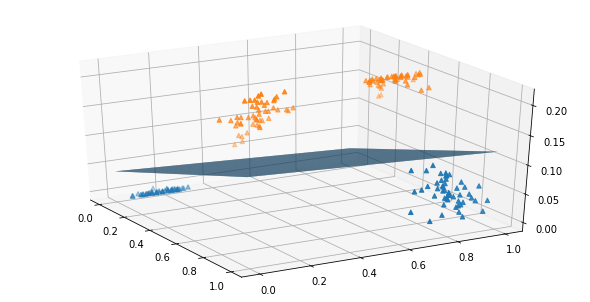

In [ ]:

fig = plt.figure( figsize=(8,4) )
ax = Axes3D(fig, elev=30, azim=-30)

for target in range(2):
    ax.scatter( X[y==target, 1], X[y==target, 0], gaussian_z[target], marker="^" )

ax.plot_surface(Y_h, X_h, Z)

# 4. Kernel Sigmoid

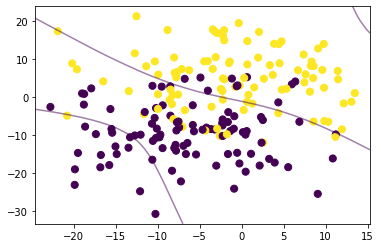

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import make_blobs

CENTERS=2

# datos de entrenamiento
Train_X, Train_y = make_blobs(n_samples=200, n_features=2,centers=CENTERS, random_state=11, cluster_std=8)


# algoritmo de maquina de soporte vectorial funcion exponencial con gamma=0.1
nonlinear_clf = svm.SVC(kernel='sigmoid', gamma='scale', C=1.0)

# modelo 
nonlinear_clf.fit(Train_X, Train_y)

# gráfica de la función de decisión
def Funcion_desicion (model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# el límite de decisión
    P = model.decision_function(xy).reshape(X.shape)
    
    # gráfica el límite de decisión
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
    
plt.scatter(Train_X[:, 0], Train_X[:, 1], c=Train_y, s=50)
Funcion_desicion(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

# 5. Kernel Polinomial

Se importan las librerias,

*   Matplotlib: Creación de gráficas.
*   Scikit Learn: Creación de SVM, base de datos de muestras aleatorias.
*   Math
*   Numpy: Manejo de matrices y tuplas
*   Pandas: Manejo de datasets, DataFrames e indexación.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


Generar un conjunto de datos, que formen un círculo y que son imposible de clasificar mediante regresiones.
Además, creamos un DataFrame con ambas características y la clasificación de cada muestra.

In [ ]:
X, y = make_circles(n_samples=200, noise=0.10, random_state=20)
df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))

Graficar los datos en el plano, clase A corresponde al color <font color='blue'>azul</font> y la clase B corresponde al color <font color='orange'>amarillo</font>.

Con ```groupby("y")```, podemos separar el DataFrame, usando la clasificación (Si es clase A o clase B).




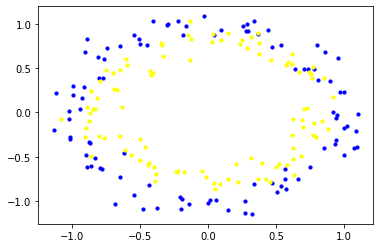

In [ ]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'yellow'}
grouped = df.groupby('y')
for key, group in grouped:
    plt.scatter(group['x1'], group['x2'],color=colors[key], s=10)
plt.show()

Construir el clasificador, que maneja un Kernel Polinomial.
Dividir el conjunto de datos (Datos para entrenar modelo, y para testear el modelo).
Finalmente, ajustar el modelo usando los datos de entrenamiento.

In [ ]:
clf = svm.SVC(kernel='poly')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='poly')

Realiza la predicción de la clase de los objetos, usando los datos de prueba.

In [ ]:
y_pred = clf.predict(X_test)

Con ```sklearn.metrics```, permite usar métricas para conocer el rendimiento, precisión, etc... del modelo, usando los datos prueba (Clasificación real) y los datos predichos (La predicción).

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25 46]
 [28 41]]
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        71
           1       0.47      0.59      0.53        69

    accuracy                           0.47       140
   macro avg       0.47      0.47      0.46       140
weighted avg       0.47      0.47      0.46       140



Graficar las muestras en el plano.

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="x1", y="x2", color="y")
fig.show()

En el espacio, observe la clasificación real de los puntos a testear. 

In [ ]:
df1 = pd.DataFrame(dict(x1=X_test[:, 0], x2=X_test[:, 1], y=y_test))
fig = px.scatter_3d(df1, x='x1', y='x2', z='y', color='y')
fig.show()

En contraste, tenemos la clasificación predicha por la SVM.

In [ ]:
df1 = pd.DataFrame(dict(x1=X_test[:, 0], x2=X_test[:, 1], y=y_pred))
fig = px.scatter_3d(df1, x='x1', y='x2', z='y', color='y')
fig.show()

# Caso de Aplicación 1: Clasificación de Números

Se importan las librerias,

*   Matplotlib: Creación de gráficas.
*   Scikit Learn: Creación de SVM, base de datos de muestras aleatorias.
*   Math
*   Numpy: Manejo de matrices y tuplas
*   Pandas: Manejo de datasets, DataFrames e indexación.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import math
import numpy as np
import pandas as pd

Cargar la base de datos de los dígitos. Corresponden a conjuntos de matrices, que representan cada número.

In [ ]:
digits = load_digits()

Graficar una parte de los dígitos en una grilla de $5$x$5$.

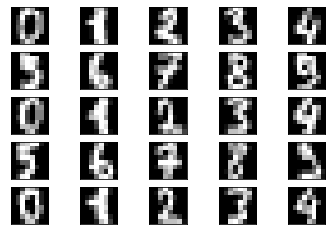

In [ ]:
fig, axes = plt.subplots(5,5)
plt.gray()
for x in range(5):
    for y in range(5):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        axes[x][y].imshow(digits.images[(5*x)+y])

Dividir el conjunto de datos (Datos para entrenar modelo, y para testear el modelo).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.25, random_state=0)

Construir la máquina de soporte vectorial, se puede usar un kernel ya sea lineal, gaussiano, etc...

In [ ]:
clf = svm.SVC(kernel="rbf")

Ajustar el modelo, con los datos de entrenamiento.

In [ ]:
clf.fit(X_train, y_train)

SVC()

Puntaje del SVM, precisión promedio de la predicción del modelo.

In [ ]:
print(clf.score(X_test, y_test))

0.9911111111111112


Predicción del conjunto de datos de prueba.

In [ ]:
y_pred = clf.predict(X_test)

Métricas, se mide la eficiencia y precisión del modelo de clasificación.
Se usa la matriz de confusión para identificar las clasificaciones correctas (En la diagonal), y las incorrectas.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       

Mostrar los números de prueba, con la clasificación del SVM en un label.

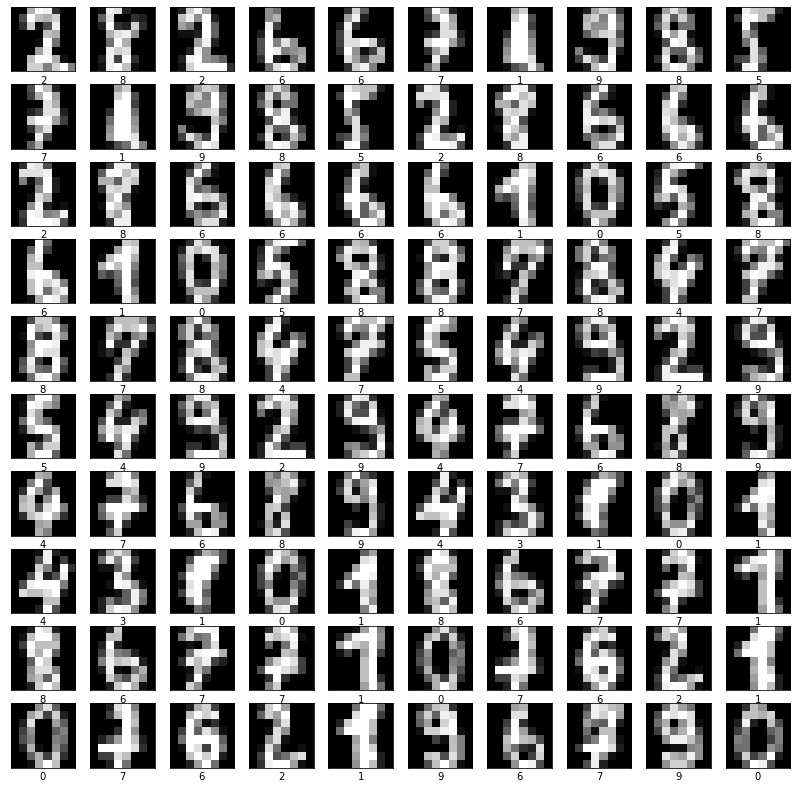

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])


**Experimento 1:** Vamos a ver qué pasa cuando tomamos un conjunto de datos más pequeño para entrenar.

Cuando se toma el 5% de los datos para entrenar, entonces el puntaje del clasificador es de 87%, es decir, mientras se disminuye este número disminuye la precisión, además, que el tiempo de ejecución aumenta ligeramente.

0.870023419203747
[[166   0   0   0   2   5   0   0   0   0]
 [  0 132  15   2   2   1   0   0   0  22]
 [  0   1 164   1   0   0   0   0   0   0]
 [  0   0   2 161   0   2   0   6   2   0]
 [  0   0   0   0 163   1   0   4   0   0]
 [  0   1   0   0   1 166   1   0   0   2]
 [  0   4   0   0   1   0 167   0   0   0]
 [  0   1   1   0   0   5   0 163   0   0]
 [  0  19  13  13   2   6   1   4 102   8]
 [  0   0   0  48   0  14   0   8   1 102]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       173
           1       0.84      0.76      0.80       174
           2       0.84      0.99      0.91       166
           3       0.72      0.93      0.81       173
           4       0.95      0.97      0.96       168
           5       0.83      0.97      0.89       171
           6       0.99      0.97      0.98       172
           7       0.88      0.96      0.92       170
           8       0.97      0.61      0.75       168
          

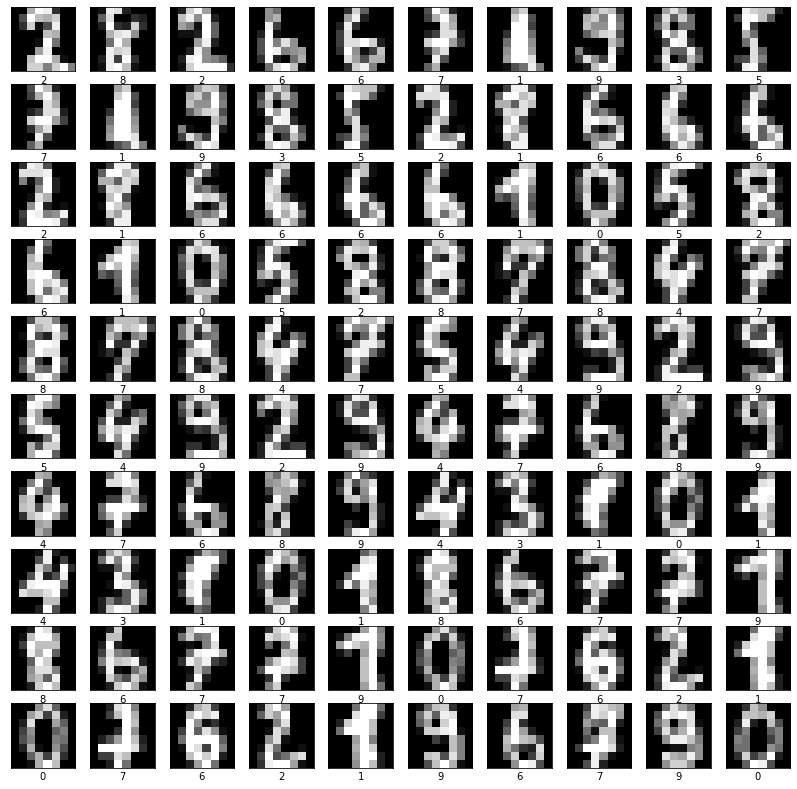

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.95, random_state=0)
 clf = svm.SVC(kernel="rbf")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

En cambio, cuando toma el 95% de los datos de la prueba, la precisión de la predicción es de casi 100% (La máquina toma el 99.999...% periódico como 100%).

1.0
[[ 7  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9

    accuracy                           1.00        90
   macro avg   

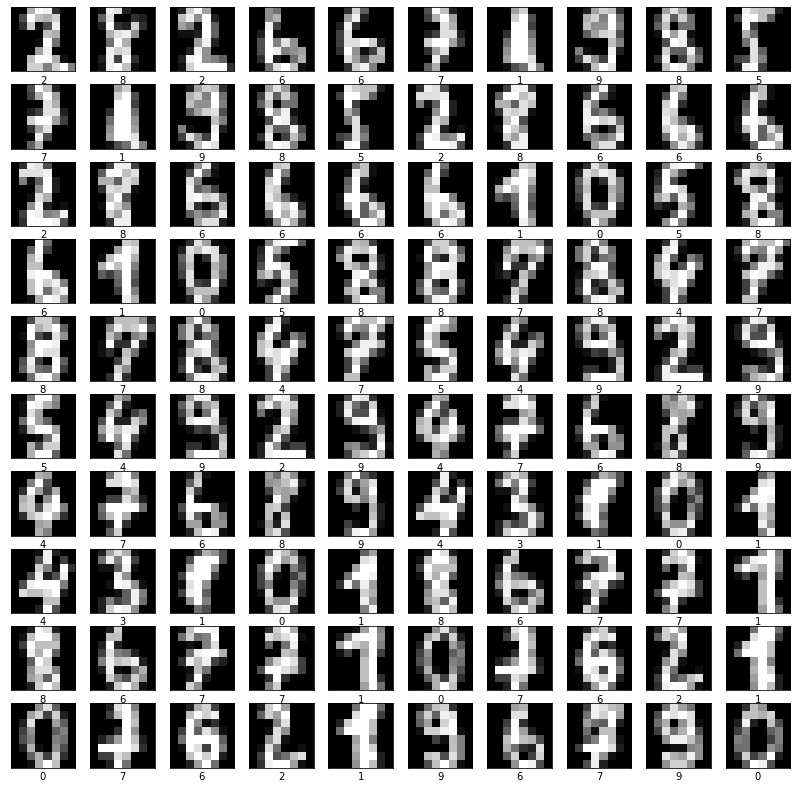

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.05, random_state=0)
 clf = svm.SVC(kernel="rbf")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

**Experimento 2:** Intentamos tomar otros kernel para probar la precisión de la predicción.

Si bien, todas tienen una precisión que ronda el 90-100%, tenemos que:

1.   Gaussiano: 99.1%
2.   Polinomial: 98.8%
3.   Lineal: 97.7%
4.   Sigmoid: 90.89%

La diferencia de porcentajes, puede marcar la diferencia. 



0.9888888888888889
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.96      1.00      0.98        43
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        48
           8       1.00      0.98      0.99        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450


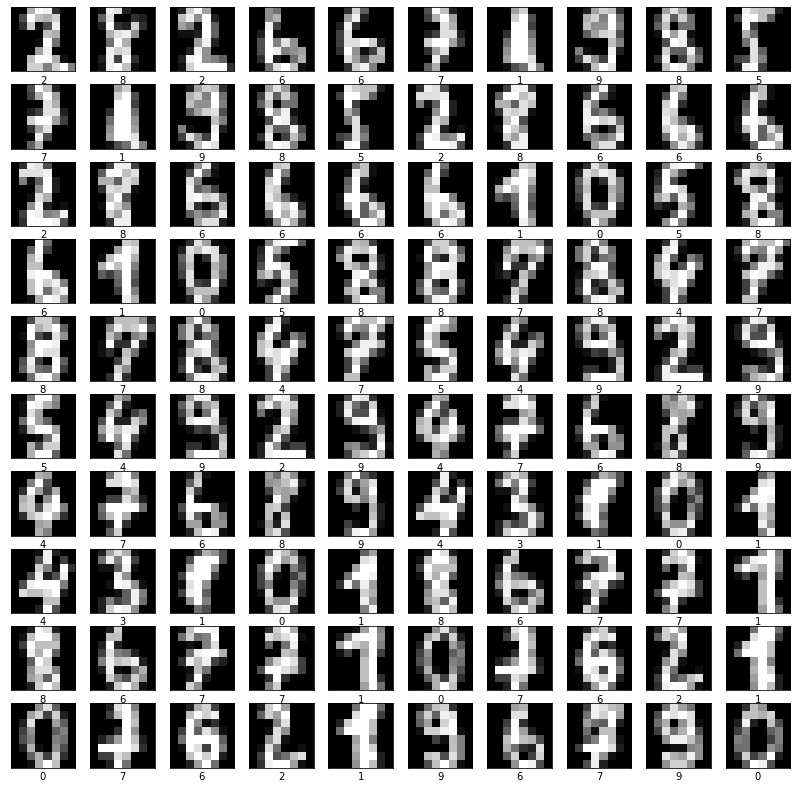

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.25, random_state=0)
 clf = svm.SVC(kernel="poly")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

0.9911111111111112
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450


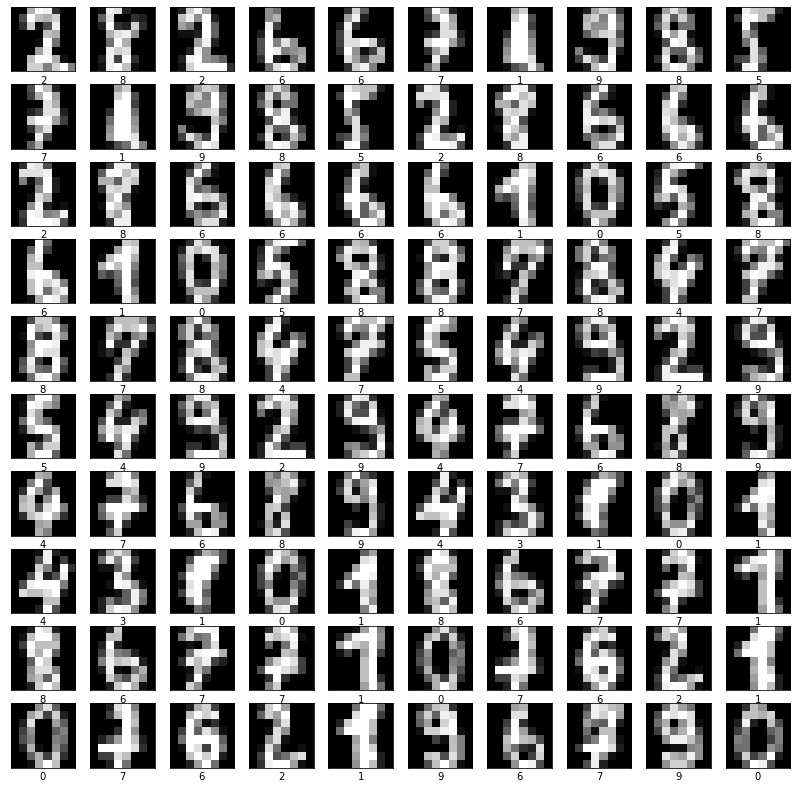

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.25, random_state=0)
 clf = svm.SVC(kernel="rbf")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

0.9711111111111111
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450


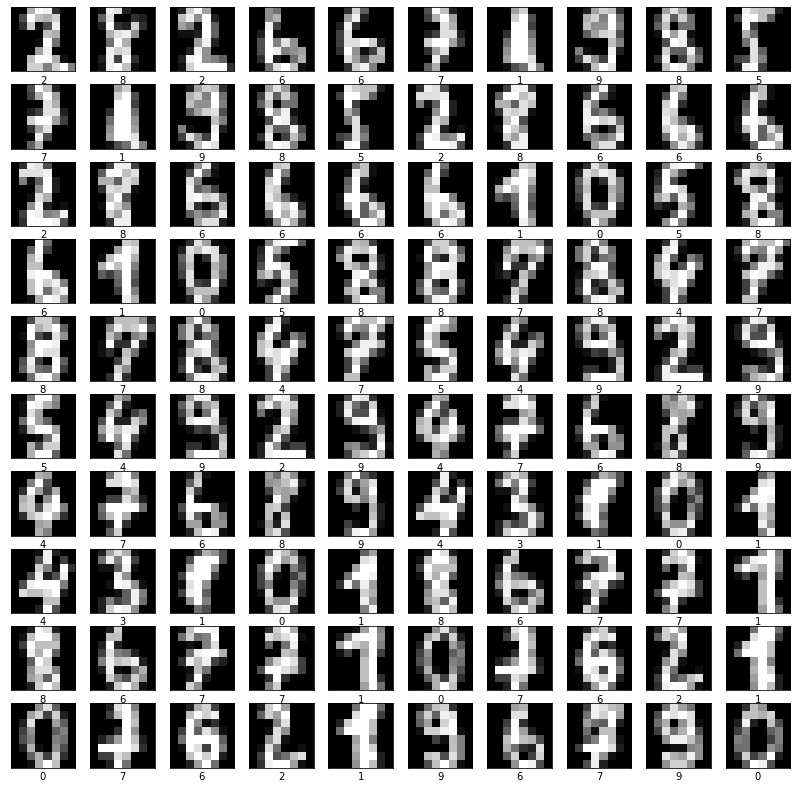

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.25, random_state=0)
 clf = svm.SVC(kernel="linear")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

0.9088888888888889
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  2  3  1  1]
 [ 0  3 41  0  0  0  0  0  0  0]
 [ 0  1  0 40  0  0  0  0  3  1]
 [ 0  1  0  0 36  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  2  0 49  0  0  0]
 [ 1  3  0  0  0  0  0 44  0  0]
 [ 0  6  0  0  0  1  0  0 38  3]
 [ 1  0  0  0  0  1  0  2  1 42]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.70      0.81      0.75        43
           2       1.00      0.93      0.96        44
           3       1.00      0.89      0.94        45
           4       0.92      0.95      0.94        38
           5       0.96      0.98      0.97        48
           6       0.96      0.94      0.95        52
           7       0.88      0.92      0.90        48
           8       0.88      0.79      0.84        48
           9       0.88      0.89      0.88        47

    accuracy                           0.91       450


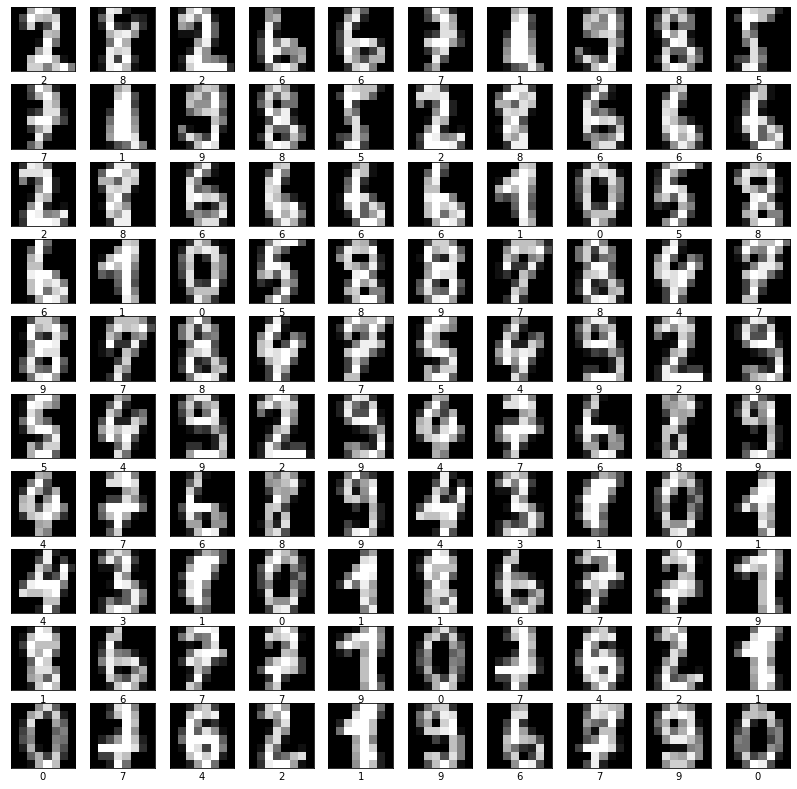

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.25, random_state=0)
 clf = svm.SVC(kernel="sigmoid")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

Observe que al disminuir los datos de entrenamiento con el kernel Sigmoid, se hace una predicción bastante regular, sólo un 51% de aciertos. Por lo tanto, este kernel no es tan adecuado para trabajar estos problemas.

0.7669962917181706
[[159   0   0   0   2   0   0   0   0   0]
 [  0 110  17   0   0   3   0   0   0  33]
 [  0   6 146   3   0   0   0   1   0   3]
 [  2   5   9  68   0   6   0   6   0  72]
 [  1   4   0   0 149   0   0   5   0   0]
 [  0   0   0   0   1 154   1   0   0   5]
 [  3   4   0   0   6   0 153   0   0   0]
 [  0   1   0   0   1   5   0 151   0   1]
 [  0  47  25   0   1  12   5  11   0  60]
 [  0   0   0   0   0   3   0   7   0 151]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       161
           1       0.62      0.67      0.65       163
           2       0.74      0.92      0.82       159
           3       0.96      0.40      0.57       168
           4       0.93      0.94      0.93       159
           5       0.84      0.96      0.90       161
           6       0.96      0.92      0.94       166
           7       0.83      0.95      0.89       159
           8       0.00      0.00      0.00       161
         

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



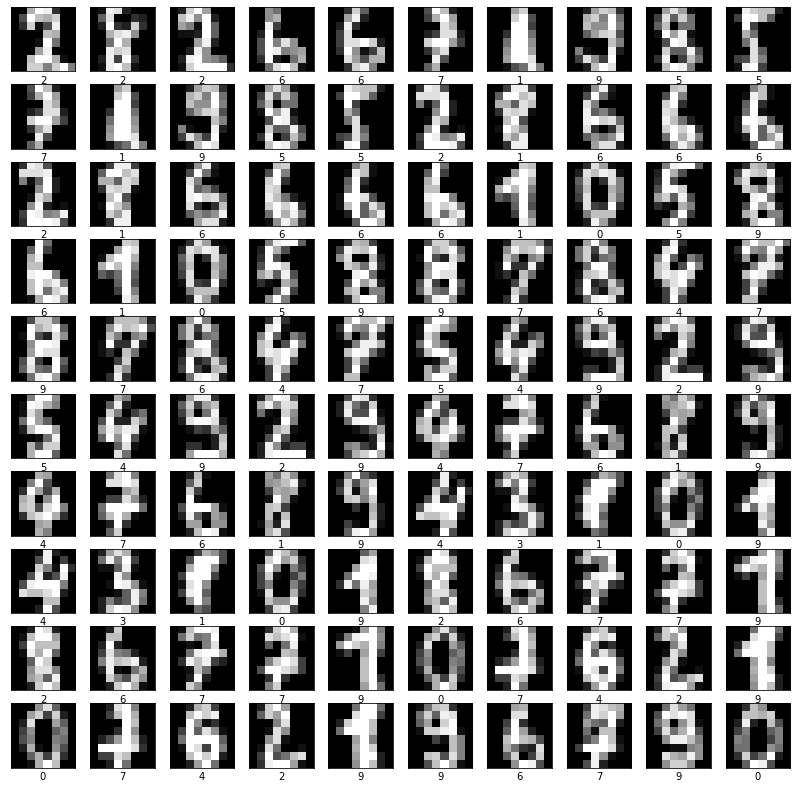

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.90, random_state=0)
 clf = svm.SVC(kernel="sigmoid")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

En cambio, con el Kernel Gaussiano, aunque se disminuyan los datos de entrenamiento, se sigue dando una muy buena predicción. Por lo tanto, este es un buen kernel para trabajar este problema.

0.9419035846724351
[[160   0   0   0   1   0   0   0   0   0]
 [  0 149   3   0   0   1   0   0   0  10]
 [  0   1 157   1   0   0   0   0   0   0]
 [  0   0   0 155   0   2   0   4   4   3]
 [  0   0   0   0 155   0   0   2   2   0]
 [  0   1   0   0   1 155   1   0   0   3]
 [  0   2   0   0   0   0 164   0   0   0]
 [  0   0   0   0   0   1   0 155   1   2]
 [  0  15   1   0   1   4   2   2 121  15]
 [  0   0   0   1   0   2   0   4   1 153]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.89      0.91      0.90       163
           2       0.98      0.99      0.98       159
           3       0.99      0.92      0.95       168
           4       0.98      0.97      0.98       159
           5       0.94      0.96      0.95       161
           6       0.98      0.99      0.98       166
           7       0.93      0.97      0.95       159
           8       0.94      0.75      0.83       161
         

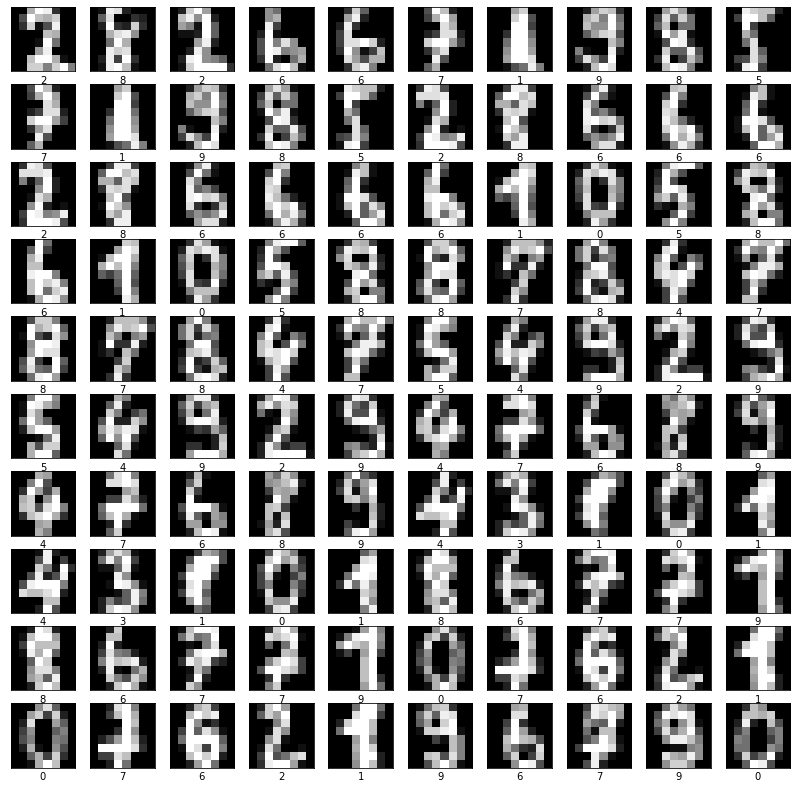

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
        test_size=0.90, random_state=0)
 clf = svm.SVC(kernel="rbf")
 clf.fit(X_train, y_train)
 print(clf.score(X_test, y_test))
 y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10,10, figsize=(14,14))
for x in range(10):
    for y in range(10):
        axes[x][y].set_xticks([])
        axes[x][y].set_yticks([])
        image = X_test[(5*x)+y].reshape(8, 8)
        axes[x][y].imshow(image)
        axes[x][y].set_xlabel(y_pred[(5*x)+y])

# Caso de Aplicación 2: Clasificación de correos SPAM

In [ ]:
import re
import numpy as np
from nltk.stem import PorterStemmer
import scipy.io as sio

Para este cuaderno, utilizaremos el vocabulario (el cual es una lista que asocia algunas palabras con números) y el dataset de correso de Andrew Ng utilizado en el curso de coursera "Unsupervised Learning, Recommenders, Reinforcement Learning".

In [ ]:
ejem_1 = open("ejemcorreo.txt","r").read()
vocabList = open("vocabulario.txt","r").read()

Los elementos de **vocabList** son de la forma.

In [ ]:
vocabList

'1\taa\n2\tab\n3\tabil\n4\tabl\n5\tabout\n6\tabov\n7\tabsolut\n8\tabus\n9\tac\n10\taccept\n11\taccess\n12\taccord\n13\taccount\n14\tachiev\n15\tacquir\n16\tacross\n17\tact\n18\taction\n19\tactiv\n20\tactual\n21\tad\n22\tadam\n23\tadd\n24\taddit\n25\taddress\n26\tadministr\n27\tadult\n28\tadvanc\n29\tadvantag\n30\tadvertis\n31\tadvic\n32\tadvis\n33\tae\n34\taf\n35\taffect\n36\taffili\n37\tafford\n38\tafrica\n39\tafter\n40\tag\n41\tagain\n42\tagainst\n43\tagenc\n44\tagent\n45\tago\n46\tagre\n47\tagreement\n48\taid\n49\tair\n50\tal\n51\talb\n52\talign\n53\tall\n54\tallow\n55\talmost\n56\talon\n57\talong\n58\talreadi\n59\talsa\n60\talso\n61\taltern\n62\talthough\n63\talwai\n64\tam\n65\tamaz\n66\tamerica\n67\tamerican\n68\tamong\n69\tamount\n70\tamp\n71\tan\n72\tanalysi\n73\tanalyst\n74\tand\n75\tani\n76\tanim\n77\tannounc\n78\tannual\n79\tannuiti\n80\tanoth\n81\tanswer\n82\tanti\n83\tanumb\n84\tanybodi\n85\tanymor\n86\tanyon\n87\tanyth\n88\tanywai\n89\tanywher\n90\taol\n91\tap\n92\tapolog\

In [ ]:
vocabList = vocabList.split("\n")[:-1] #convierte a \n en un espacio para la lista
vocabList

['1\taa',
 '2\tab',
 '3\tabil',
 '4\tabl',
 '5\tabout',
 '6\tabov',
 '7\tabsolut',
 '8\tabus',
 '9\tac',
 '10\taccept',
 '11\taccess',
 '12\taccord',
 '13\taccount',
 '14\tachiev',
 '15\tacquir',
 '16\tacross',
 '17\tact',
 '18\taction',
 '19\tactiv',
 '20\tactual',
 '21\tad',
 '22\tadam',
 '23\tadd',
 '24\taddit',
 '25\taddress',
 '26\tadministr',
 '27\tadult',
 '28\tadvanc',
 '29\tadvantag',
 '30\tadvertis',
 '31\tadvic',
 '32\tadvis',
 '33\tae',
 '34\taf',
 '35\taffect',
 '36\taffili',
 '37\tafford',
 '38\tafrica',
 '39\tafter',
 '40\tag',
 '41\tagain',
 '42\tagainst',
 '43\tagenc',
 '44\tagent',
 '45\tago',
 '46\tagre',
 '47\tagreement',
 '48\taid',
 '49\tair',
 '50\tal',
 '51\talb',
 '52\talign',
 '53\tall',
 '54\tallow',
 '55\talmost',
 '56\talon',
 '57\talong',
 '58\talreadi',
 '59\talsa',
 '60\talso',
 '61\taltern',
 '62\talthough',
 '63\talwai',
 '64\tam',
 '65\tamaz',
 '66\tamerica',
 '67\tamerican',
 '68\tamong',
 '69\tamount',
 '70\tamp',
 '71\tan',
 '72\tanalysi',
 '73\tan

In [ ]:
vocabulario = {}

for i in vocabList:
    valor, palabra = i.split("\t")
    vocabulario[palabra] = valor

vocabulario

{'aa': '1',
 'ab': '2',
 'abil': '3',
 'abl': '4',
 'about': '5',
 'abov': '6',
 'absolut': '7',
 'abus': '8',
 'ac': '9',
 'accept': '10',
 'access': '11',
 'accord': '12',
 'account': '13',
 'achiev': '14',
 'acquir': '15',
 'across': '16',
 'act': '17',
 'action': '18',
 'activ': '19',
 'actual': '20',
 'ad': '21',
 'adam': '22',
 'add': '23',
 'addit': '24',
 'address': '25',
 'administr': '26',
 'adult': '27',
 'advanc': '28',
 'advantag': '29',
 'advertis': '30',
 'advic': '31',
 'advis': '32',
 'ae': '33',
 'af': '34',
 'affect': '35',
 'affili': '36',
 'afford': '37',
 'africa': '38',
 'after': '39',
 'ag': '40',
 'again': '41',
 'against': '42',
 'agenc': '43',
 'agent': '44',
 'ago': '45',
 'agre': '46',
 'agreement': '47',
 'aid': '48',
 'air': '49',
 'al': '50',
 'alb': '51',
 'align': '52',
 'all': '53',
 'allow': '54',
 'almost': '55',
 'alon': '56',
 'along': '57',
 'alreadi': '58',
 'alsa': '59',
 'also': '60',
 'altern': '61',
 'although': '62',
 'alwai': '63',
 'am': 

## Preprocesamiento del correo

En esta parte eliminaremos varios objetos que generan ruido a la hora de entrenar el modelo.

In [ ]:
def Preprocesamiento (contenido_principal):
    
    # pone el correo en letra minúscula
    contenido_principal = contenido_principal.lower()
    # elimina números del correo
    contenido_principal = re.sub("[\d]+","number",contenido_principal)
    # elimina URL
    contenido_principal = re.sub("[^\s]+@[^\s]+","emailaddr",contenido_principal)
    # elimina caracteres especiales
    contenido_principal = re.sub("[^A-Za-z0-9\s]+","",contenido_principal)
    # elimina lineas nuevas
    contenido_principal = re.sub("\n{2,2}","",contenido_principal)
    contenido_principal = re.sub("\s\n"," ",contenido_principal)
    contenido_principal = re.sub("\n"," ",contenido_principal)
    # elimina espacio extra al principio
    contenido_principal = re.sub("^\s","",contenido_principal)
    
    return contenido_principal

In [ ]:
ejem_1

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [ ]:
Preprocesamiento(ejem_1)

'anyone knows how much it costs to host a web portal well it depends on how many visitors youre expecting this can be anywhere from less than number bucks a month to a couple of number you should checkout httpwwwrackspacecom or perhaps amazon ecnumber if youre running something bigto unsubscribe yourself from this mailing list send an email to emailaddr'

A pesar de que el procedimiento original no propone hacer una limpieza a la forma verbal en la que se encuentren las palabras, en este caso es necesario pues no todas las formas verbales de todas las palabras estan en vocabulario. Por ejemplo podemos obtener el valor de 'accord' pero no el valor de 'according', o podemos encontrar el valor correspondiente a 'discount' pero no a 'discounts'.

In [ ]:
def Texto_arreglado(cuerpo):

    contenido_principal = Preprocesamiento(cuerpo)
    ps = PorterStemmer()
    contenido_principal = [ps.stem(token) for token in contenido_principal.split(" ")]
    contenido_principal = " ".join(contenido_principal)
    return contenido_principal


In [ ]:
Texto_arreglado("discounts according")

'discount accord'

## Extracción de las caracteristicas

En esta parte, pretendemos asociarles a cada correo un vector para poder entrenar el modelo. Para ello, primero creemos una función que identifique cuales de las palabras estan en **vocabulario**.

In [ ]:
# vector de indices de las palabras que pertenecen al bocabulario
def Vector_indices_correo(vocabulario, cuerpo):
    
    Textoarreglado = Texto_arreglado(cuerpo)
    indices = []
    for i in Textoarreglado.split():
        if len(i)>0 and i in vocabulario:
            indices.append(int(vocabulario[i]))
    return indices

In [ ]:
Vector_indices_correo(vocabulario, ejem_1)

[86,
 916,
 794,
 1077,
 883,
 370,
 1699,
 790,
 1822,
 1831,
 883,
 431,
 1171,
 794,
 1002,
 1895,
 592,
 1676,
 238,
 162,
 89,
 688,
 945,
 1663,
 1120,
 1062,
 1699,
 375,
 1162,
 1120,
 1893,
 1510,
 1182,
 1237,
 810,
 1895,
 1440,
 1547,
 1758,
 1896,
 688,
 1676,
 992,
 961,
 1477,
 71,
 530,
 1699,
 531]

Ahora, queremos crear un vector en $R^n$ con $n$ un entero fijo. Podemos lograr esto se puede lograr tomando un vector de $n$ ceros, con $n=$**len(vocabulario)**, y cambiar los componenetes del vector cuyos indices sean valores de palabras que aparecen en el correo por un $1$.

In [ ]:
def Vector_caracteristicas(vocabulario, cuerpo):
    indices = Vector_indices_correo(vocabulario, cuerpo)
    n =len(vocabulario)
    vectorcar = np.zeros((n,1))
    for i in indices:
        vectorcar[i] = 1
    return vectorcar

In [ ]:
vectorcar_1 = Vector_caracteristicas(vocabulario, ejem_1)
vectorcar_1

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [ ]:
from sklearn.svm import SVC
import pandas as pd

spam_mat = sio.loadmat('spamTrain.mat')
X_train =spam_mat["X"]
y_train = spam_mat["y"]

len(X_train)

4000

**Entrenamiento del modelo usando todo el dataset:**

Primero veamos que pasa cuando entrenomos el modelo con los 4000 datos del dataset para cada uno de los kernel vistos anteriormente.

In [ ]:
# entrenamos el modelo con kernel lineal
spam_svc_linear = SVC(kernel ="linear", C=1)
# entrenamos el modelo con kernel polinomial
spam_svc_poly = SVC(kernel ="poly", C=1)
# entrenamos el modelo con kernel Gaussiano
spam_svc_rbf = SVC(kernel ="rbf", C=1)
# entrenamos el modelo con kernel Sigmoid
spam_svc_sigmoid = SVC(kernel ="sigmoid", C=1)

# ajustamos los datos de entrenamiento con kernel lineal
spam_svc_linear.fit(X_train,y_train.ravel())
# ajustamos los datos de entrenamiento con kernel polinomial
spam_svc_poly.fit(X_train,y_train.ravel())
# ajustamos los datos de entrenamiento con kernel Gaussiano
spam_svc_rbf.fit(X_train,y_train.ravel())
# ajustamos los datos de entrenamiento con kernel Sigmoid
spam_svc_sigmoid.fit(X_train,y_train.ravel())


print("Puntaje de presición de los datos de entrenamiento con kernel lineal:",(spam_svc_linear.score(X_train,y_train.ravel()))*100,"%")
print("Puntaje de presición de los datos de entrenamiento con kernel polinomial:",(spam_svc_poly.score(X_train,y_train.ravel()))*100,"%")
print("Puntaje de presición de los datos de entrenamiento con kernel Gaussiano:",(spam_svc_rbf.score(X_train,y_train.ravel()))*100,"%")
print("Puntaje de presición de los datos de entrenamiento con kernel Sigmoid:",(spam_svc_sigmoid.score(X_train,y_train.ravel()))*100,"%")

Puntaje de presición de los datos de entrenamiento con kernel lineal: 99.97500000000001 %
Puntaje de presición de los datos de entrenamiento con kernel polinomial: 92.35 %
Puntaje de presición de los datos de entrenamiento con kernel Gaussiano: 99.325 %
Puntaje de presición de los datos de entrenamiento con kernel Sigmoid: 93.55 %


Vemos que para algunos kernel el puntaje de preición con los datos de entrenamiento puede ser un poco más bajo que el de los otros. Sin embargo, esto depende del problema abordar.

In [ ]:
spam_mat_test = sio.loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

# predice las clases de los datos de entrenamiento 
# para cada uno de los kernel dados anteriormente
spam_svc_linear.predict(X_test)
spam_svc_linear.predict(X_test)
spam_svc_linear.predict(X_test)
spam_svc_linear.predict(X_test)

print("Puntaje de presición con kernel lineal:",(spam_svc_linear.score(X_test,y_test.ravel()))*100,"%")
print("Puntaje de presición con kernel polinomial:",(spam_svc_poly.score(X_test,y_test.ravel()))*100,"%")
print("Puntaje de presición con kernel Gaussiano:",(spam_svc_rbf.score(X_test,y_test.ravel()))*100,"%")
print("Puntaje de presición con kernel Sigmoid:",(spam_svc_sigmoid.score(X_test,y_test.ravel()))*100,"%")

Puntaje de presición con kernel lineal: 97.8 %
Puntaje de presición con kernel polinomial: 90.0 %
Puntaje de presición con kernel Gaussiano: 98.7 %
Puntaje de presición con kernel Sigmoid: 93.10000000000001 %


Vemos que a pesar de que le modelo con kernel lineal se adapta mejor a los datos de entrenamiento, el model con kernel Gausiano predice mucho mejor con los datos de prueba.

**Usando menos datos de entrenamiento:**

Tomemos un conjunto más pequeño de datos y repitamos el mismo procedimiento.

In [ ]:
X_train = X_train[:1000]
y_train = y_train[:1000]

len(X_train)

1000

In [ ]:
# entrenamos el modelo con kernel lineal
spam_svc_linear = SVC(kernel ="linear", C=1)
# entrenamos el modelo con kernel polinomial
spam_svc_poly = SVC(kernel ="poly", C=1)
# entrenamos el modelo con kernel Gaussiano
spam_svc_rbf = SVC(kernel ="rbf", C=1)
# entrenamos el modelo con kernel Sigmoid
spam_svc_sigmoid = SVC(kernel ="sigmoid", C=1)

# ajustamos los datos de entrenamiento con kernel lineal
spam_svc_linear.fit(X_train,y_train.ravel())
# ajustamos los datos de entrenamiento con kernel polinomial
spam_svc_poly.fit(X_train,y_train.ravel())
# ajustamos los datos de entrenamiento con kernel Gaussiano
spam_svc_rbf.fit(X_train,y_train.ravel())
# ajustamos los datos de entrenamiento con kernel Sigmoid
spam_svc_sigmoid.fit(X_train,y_train.ravel())


print("Puntaje de presición de los datos de entrenamiento con kernel lineal:",(spam_svc_linear.score(X_train,y_train.ravel()))*100,"%")
print("Puntaje de presición de los datos de entrenamiento con kernel polinomial:",(spam_svc_poly.score(X_train,y_train.ravel()))*100,"%")
print("Puntaje de presición de los datos de entrenamiento con kernel Gaussiano:",(spam_svc_rbf.score(X_train,y_train.ravel()))*100,"%")
print("Puntaje de presición de los datos de entrenamiento con kernel Sigmoid:",(spam_svc_sigmoid.score(X_train,y_train.ravel()))*100,"%")

Puntaje de presición de los datos de entrenamiento con kernel lineal: 100.0 %
Puntaje de presición de los datos de entrenamiento con kernel polinomial: 90.60000000000001 %
Puntaje de presición de los datos de entrenamiento con kernel Gaussiano: 98.4 %
Puntaje de presición de los datos de entrenamiento con kernel Sigmoid: 95.0 %


In [ ]:
spam_mat_test = sio.loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

# predice las clases de los datos de entrenamiento 
# para cada uno de los kernel dados anteriormente
spam_svc_linear.predict(X_test)
spam_svc_linear.predict(X_test)
spam_svc_linear.predict(X_test)
spam_svc_linear.predict(X_test)

print("Puntaje de presición con kernel lineal:",(spam_svc_linear.score(X_test,y_test.ravel()))*100,"%")
print("Puntaje de presición con kernel polinomial:",(spam_svc_poly.score(X_test,y_test.ravel()))*100,"%")
print("Puntaje de presición con kernel Gaussiano:",(spam_svc_rbf.score(X_test,y_test.ravel()))*100,"%")
print("Puntaje de presición con kernel Sigmoid:",(spam_svc_sigmoid.score(X_test,y_test.ravel()))*100,"%")

Puntaje de presición con kernel lineal: 96.1 %
Puntaje de presición con kernel polinomial: 86.1 %
Puntaje de presición con kernel Gaussiano: 96.6 %
Puntaje de presición con kernel Sigmoid: 94.39999999999999 %


Vemos que, apesar de haber reducido la cantidad de datos de entrenamiento 4 veces, el puntaje de presición de los kernels siguen manteniendose cercanos al 100% y no cambia demasiado con respecto al anterior experimento.\
Notese que con el kernel sigmoir aumenta el puntaje de precisión. 